<a href="https://colab.research.google.com/github/hardikroutray/ECG/blob/main/ECG_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
from imutils import paths
import time   # time1 = time.time(); print('Time taken: {:.1f} sec'.format(time.time() - time1))
import cv2
import pickle
import warnings
warnings.filterwarnings("ignore")
import pickle


Populating the interactive namespace from numpy and matplotlib


In [ ]:

import keras
import keras.utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

from tensorflow.keras import utils as np_utils

from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
from tensorflow import keras 
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense

In [ ]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/MyDrive', force_remount=True)

unset HISTFILE; export PS1="root@b7c9efda8951-3fa0a08868c44e1badf05dfc7af50d5f: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@b7c9efda8951-3fa0a08868c44e1badf05dfc7af50d5f: umount -f /content/MyDrive || umount /content/MyDrive; pkill -9 -x drive
umount: /content/MyDrive: no mount point specified.
umount: /content/MyDrive: no mount point specified.
root@b7c9efda8951-3fa0a08868c44e1badf05dfc7af50d5f: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@b7c9efda8951-3fa0a08868c44e1badf05dfc7af50d5f: ( while `sleep 0.5`; do if [[ -d "/content/MyDrive" && "$(ls -A /content/MyDrive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 158
root@b7c9efda8951-3fa0a08868c44e1badf05dfc7af50d5f: cat /tmp/tmpxk3y3ecb/drive.fifo | head -1 | ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task

In [ ]:
# Enter the directory
!cd /content/MyDrive/MyDrive/ECG/


# Importing any of these files is fine.
They differ by methods of preprocessing of the CSV files

In [ ]:
#Files 1
with open('/content/MyDrive/MyDrive/ECG/dataset_dict.pickle', 'rb') as file:
    dataset_dict = pickle.load(file)
# Sets with truncated max and min to remove strays
with open('/content/MyDrive/MyDrive/ECG/dataset_dict_nominmax.pickle', 'rb') as file:
    dataset_dict = pickle.load(file)


In [ ]:
#Full_no2
with open('/content/MyDrive/MyDrive/ECG/dataset_full.pickle', 'rb') as file:
    dataset_dict = pickle.load(file)


In [ ]:
dataset_dict.keys()

dict_keys(['XY', 'label'])

In [ ]:
## Only use for XY, label when we import dataset_full

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( dataset_dict['XY'], dataset_dict['label'], random_state=24)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

x_train1=X_train
x_test1=X_test

y_train1=y_train
y_test1=y_test

y_test = to_categorical(y_test1) #[:,1:5] # Since labeling is [1,2,3,4] instead \
# of [0,1,2,3]
y_train = to_categorical(y_train1)

(754, 673, 2) (754,) (252, 673, 2) (252,)


In [ ]:
# x_train1=dataset_dict['X_train']
# x_test1=dataset_dict['X_test']

# y_train1=dataset_dict['y_train']
# y_test1=dataset_dict['y_test']

# y_test = to_categorical(y_test1) #[:,1:5] # Since labeling is [1,2,3,4] instead \
# # of [0,1,2,3]
# y_train = to_categorical(y_train1) #[:,1:5] #one-hot encoding

Plotting an example to see if the coarse grained reconstruction looks reasonable. 

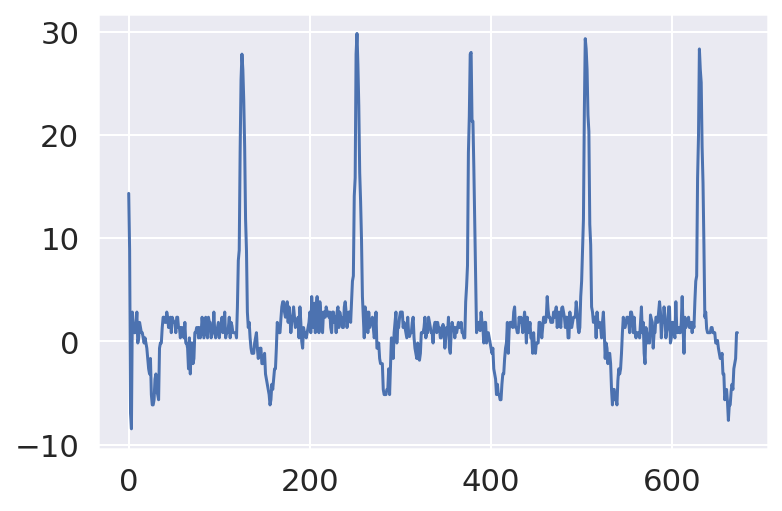

In [ ]:
plt.plot(x_train1[1,:,0],x_train1[1,:,1])
# plt.axis([0,400,-50,50])
plt.show()

In [ ]:
comb_x=np.concatenate([x_train1, x_test1],axis=0)
comb_y=np.concatenate([y_train, y_test],axis=0)

In [ ]:
v=-1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(comb_x, comb_y, random_state=150, test_size=0.2, stratify=comb_y)

x_train=x_train[:,:v,1]
x_test=x_test[:,:v,1]


x_train=np.expand_dims(x_train,2)
x_test=np.expand_dims(x_test,2)

In [ ]:
# x_test.reshape(742,1980,1)
print(x_test.shape)

y_test.shape

# Model 
1d CNN <br>
https://towardsdatascience.com/understanding-1d-and-3d-convolution-neural-network-keras-9d8f76e29610



In [ ]:
# Earlier (128)

num_classes=4

model_m = Sequential()
input_shape=(x_train.shape[1], 1)
model_m.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))

model_m.add(BatchNormalization())

model_m.add(MaxPooling1D(pool_size=(2)))

## CONV2
model_m.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))

model_m.add(BatchNormalization())

model_m.add(MaxPooling1D(pool_size=(2)))
## End CONV2

model_m.add(Flatten())
model_m.add(Dense(64, activation='tanh'))
model_m.add(Dropout(0.1))
# model_m.add(Dense(32, activation='tanh'))
# model_m.add(Dropout(0.2))
model_m.add(Dense(16, activation='relu'))
model_m.add(Dropout(0.2))
model_m.add(Dense(num_classes, activation='softmax'))
model_m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 672, 128)          512       
_________________________________________________________________
batch_normalization (BatchNo (None, 672, 128)          512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 336, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 336, 64)           24640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 336, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 168, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 10752)             0

In [ ]:
num_classes=4

model_m = Sequential()
input_shape=(x_train.shape[1], 1)
model_m.add(Conv1D(64, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))

model_m.add(BatchNormalization())

model_m.add(MaxPooling1D(pool_size=(2)))

## CONV2
model_m.add(Conv1D(32,kernel_size=3,padding = 'same', activation='relu'))

model_m.add(BatchNormalization())

model_m.add(MaxPooling1D(pool_size=(2)))
## End CONV2


## CONV2
model_m.add(Conv1D(16,kernel_size=3,padding = 'same', activation='relu'))

model_m.add(BatchNormalization())

model_m.add(MaxPooling1D(pool_size=(2)))
## End CONV2

model_m.add(Flatten())
model_m.add(Dense(32, activation='tanh'))
model_m.add(Dropout(0.1))
# model_m.add(Dense(32, activation='tanh'))
# model_m.add(Dropout(0.2))
model_m.add(Dense(16, activation='relu'))
model_m.add(Dropout(0.2))
model_m.add(Dense(num_classes, activation='softmax'))
model_m.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 672, 64)           256       
_________________________________________________________________
batch_normalization_20 (Batc (None, 672, 64)           256       
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 336, 64)           0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 336, 32)           6176      
_________________________________________________________________
batch_normalization_21 (Batc (None, 336, 32)           128       
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 168, 32)           0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 168, 16)         

In [ ]:
model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 100
EPOCHS = 100

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
shape=x_train.shape
history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      validation_split=0.1,
                      verbose=1)

Epoch 1/100
8/8 [==============================] - 4s 412ms/step - loss: 0.0591 - accuracy: 0.9834 - val_loss: 0.8027 - val_accuracy: 0.8395
Epoch 2/100
8/8 [==============================] - 3s 377ms/step - loss: 0.0785 - accuracy: 0.9723 - val_loss: 0.8312 - val_accuracy: 0.8148
Epoch 3/100
8/8 [==============================] - 3s 379ms/step - loss: 0.0698 - accuracy: 0.9765 - val_loss: 0.7749 - val_accuracy: 0.8395
Epoch 4/100
8/8 [==============================] - 3s 385ms/step - loss: 0.0592 - accuracy: 0.9876 - val_loss: 0.6955 - val_accuracy: 0.8395
Epoch 5/100
8/8 [==============================] - 3s 380ms/step - loss: 0.0561 - accuracy: 0.9889 - val_loss: 0.8705 - val_accuracy: 0.8519
Epoch 6/100
8/8 [==============================] - 3s 380ms/step - loss: 0.0560 - accuracy: 0.9806 - val_loss: 0.8837 - val_accuracy: 0.8395
Epoch 7/100
8/8 [==============================] - 3s 379ms/step - loss: 0.0401 - accuracy: 0.9917 - val_loss: 0.7805 - val_accuracy: 0.8519
Epoch 8/100
8

KeyboardInterrupt: ignored

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


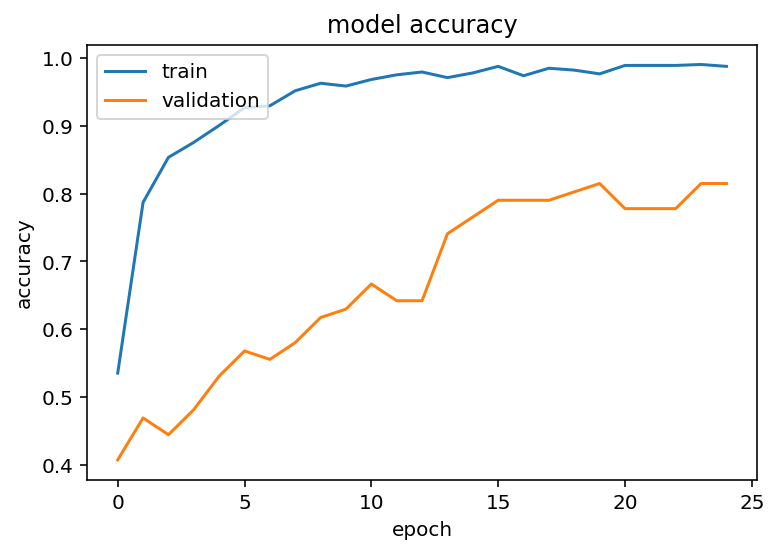

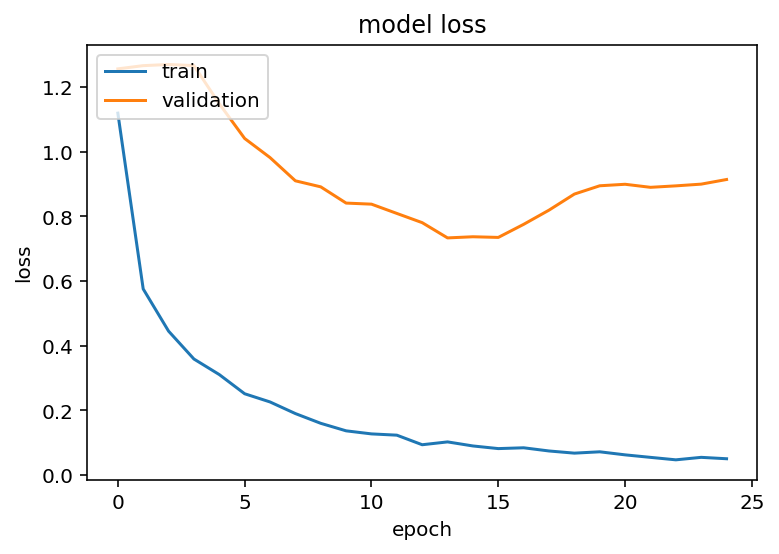

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model_m.save("model_93")
sh=x_test
score = model_m.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

INFO:tensorflow:Assets written to: model_93/assets
Test loss: 0.4121353328227997
Test accuracy: 0.9306930899620056


In [ ]:
# 0.85 when two 64 conv used

In [ ]:
import sklearn.metrics as metrics

y_test_pred = model_m.predict(x_test)  
y_test_pred_labels = np.argmax(y_test_pred, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)
# print(y_test_pred_labels)
y_test_labels = np.argmax(y_test, axis=1)
# print(y_test_labels)
confusion_matrix = metrics.confusion_matrix(y_true=y_test_labels, y_pred=y_test_pred_labels)

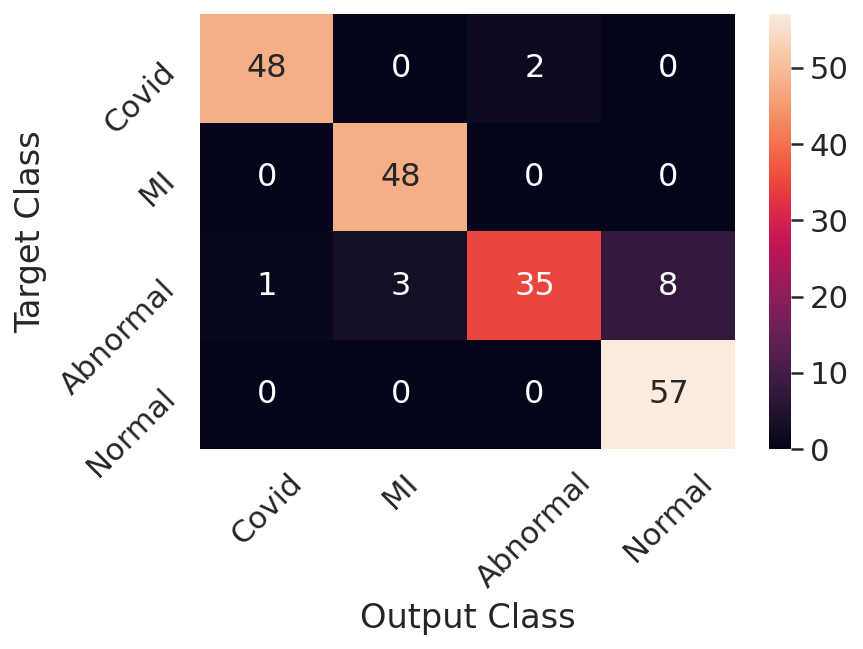

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

fig, ax = plt.subplots()

text_labels=['Covid','MI','Abnormal','Normal']
df_cm = pd.DataFrame(confusion_matrix, range(num_classes), range(num_classes))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size

ax.set_xticklabels( text_labels, rotation = 45)
ax.set_yticklabels(text_labels,rotation = 45)

plt.xlabel("Output Class")
plt.ylabel("Target Class")

plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model_m.predict(x_test, batch_size=100, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

y_test_b = np.argmax(y_test, axis=1)

print(classification_report(y_test_b, y_pred_bool, target_names=text_labels))

3/3 [==============================] - 0s 43ms/step
              precision    recall  f1-score   support

       Covid       0.98      0.96      0.97        50
          MI       0.94      1.00      0.97        48
    Abnormal       0.95      0.74      0.83        47
      Normal       0.88      1.00      0.93        57

    accuracy                           0.93       202
   macro avg       0.94      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



In [ ]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

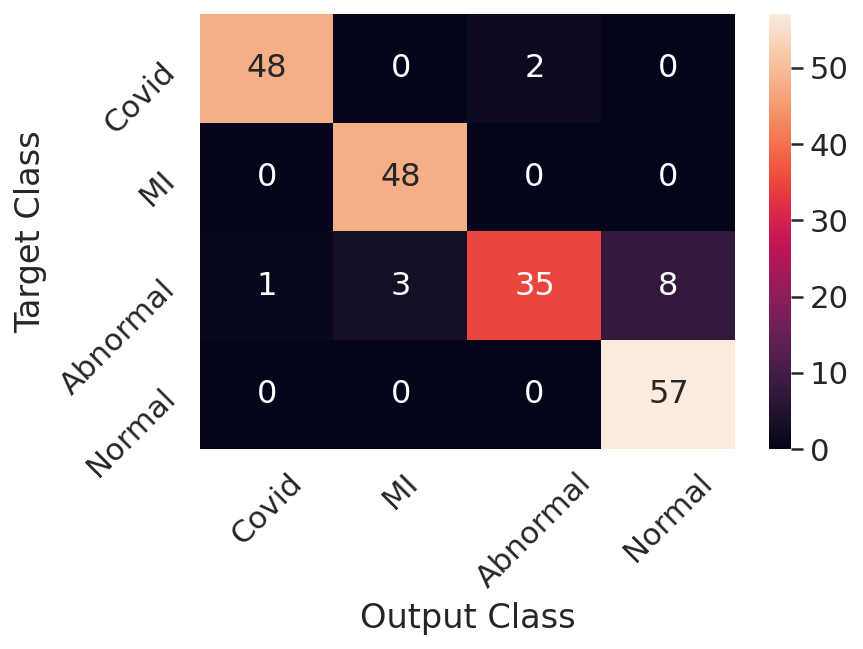